In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
def continuous_col(data):
    """ Identifies continuous columns in a DataFrame.
    Args:
        data (pd.DataFrame): The input DataFrame to check for continuous columns.
    Returns:
        list: A list of column names that are continuous (i.e., have more than two unique values).
    Raises:
        ValueError: If the input data is not a pandas DataFrame.
    """
    continuous_cols=[col for col in data.columns if data[col].nunique() > 2]
    return continuous_cols
    

In [6]:
def binary_col(data):
    """Identifies binary columns in a DataFrame.
    Args:
        data (pd.DataFrame): The input DataFrame to check for binary columns.
        Returns:
        list: A list of column names that are binary (i.e., have exactly two unique values).
        Raises:
            ValueError: If the input data is not a pandas DataFrame.


    """
    binary_cols=[col for col in data.columns if data[col].nunique() == 2]
    return binary_cols

In [7]:
# List of your result files
model_files = {
    "Logistic Regression": "Results\LR_model_results.json",
    "Random Forest": "Results\RF_model_results.json",
    "XGBoost": "Results\XGB_model_results.json",
    "SOM + Random Forest": "Results\SOM_RF_model_results.json",
    "SOM + XGBoost": "Results\SOM_XGB_model_results.json",
    "K-Means + Random Forest": "Results\K-Means_RF_model_results.json",
    "K-Means + XGBoost": "Results\K-Means_XGB_model_results.json"
}

In [8]:
# Load your scaled data
data_scaled = pd.read_csv('Tables/bnpl_scaled.csv', index_col=0)


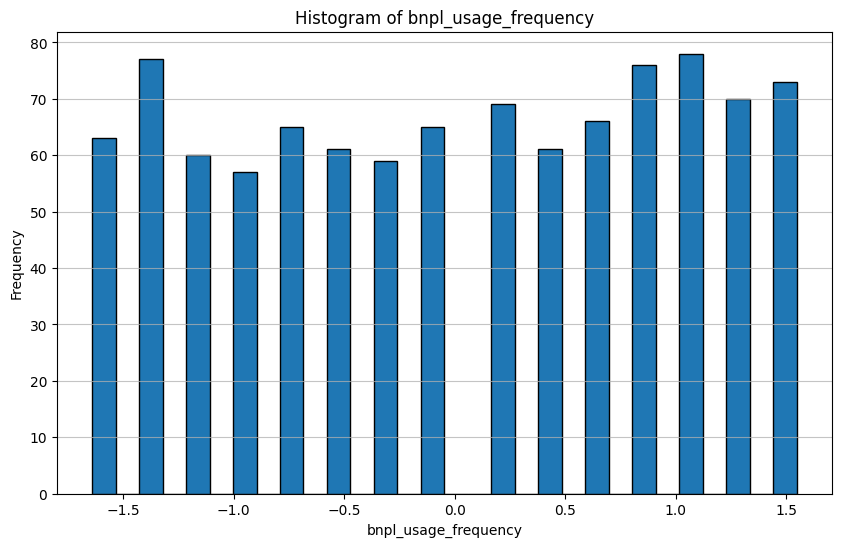

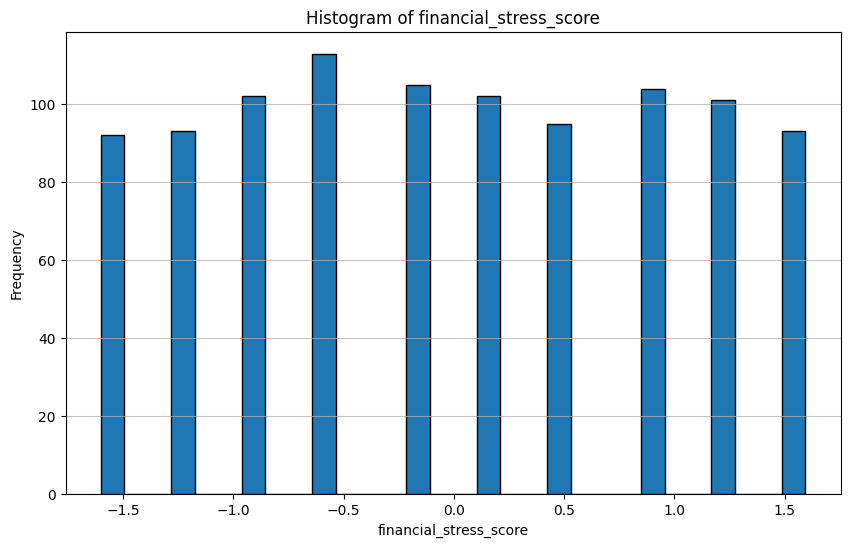

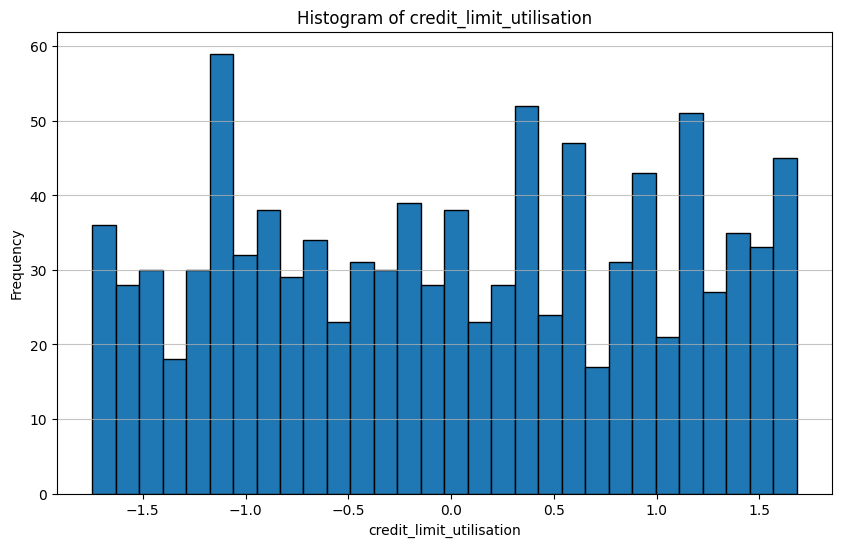

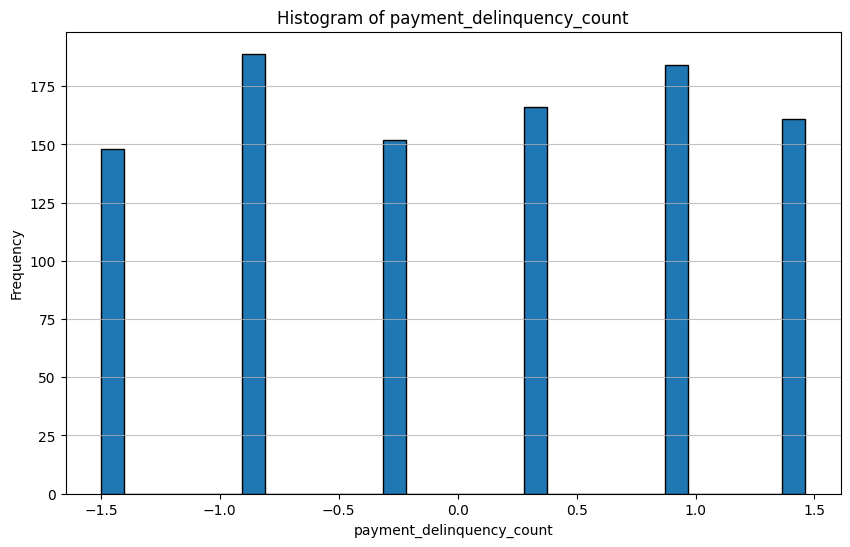

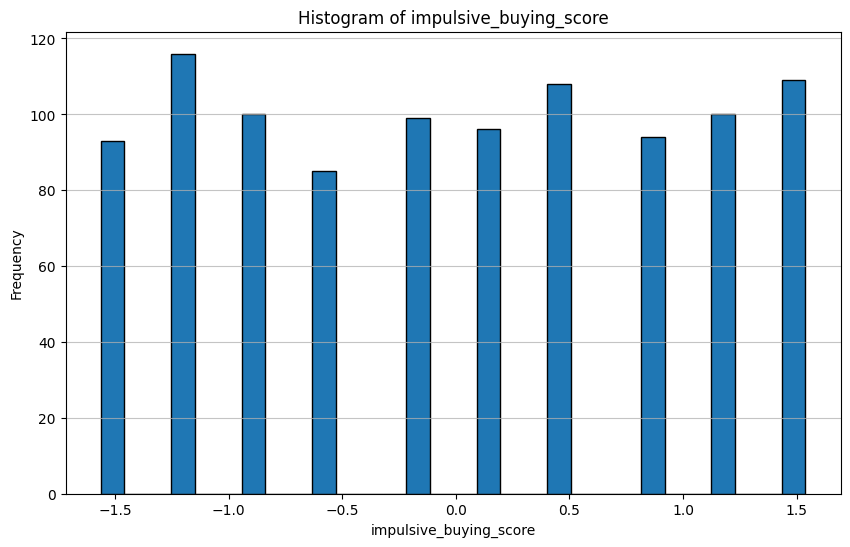

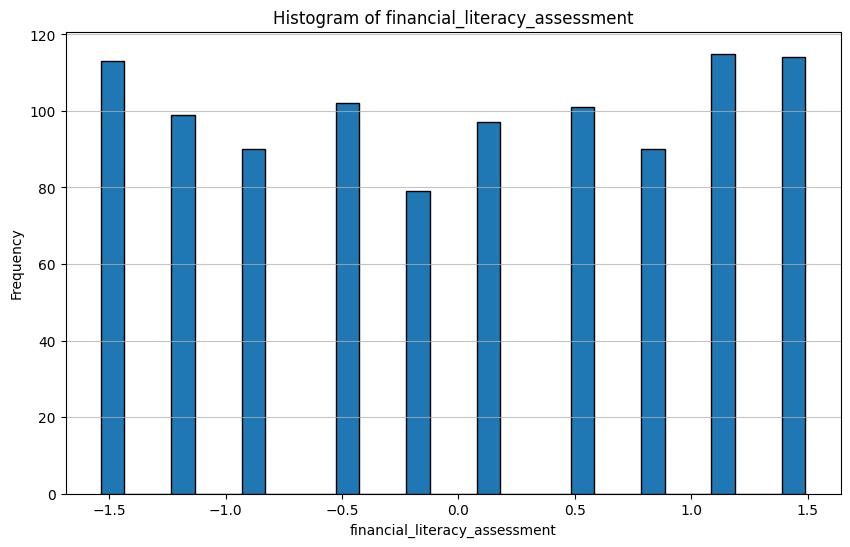

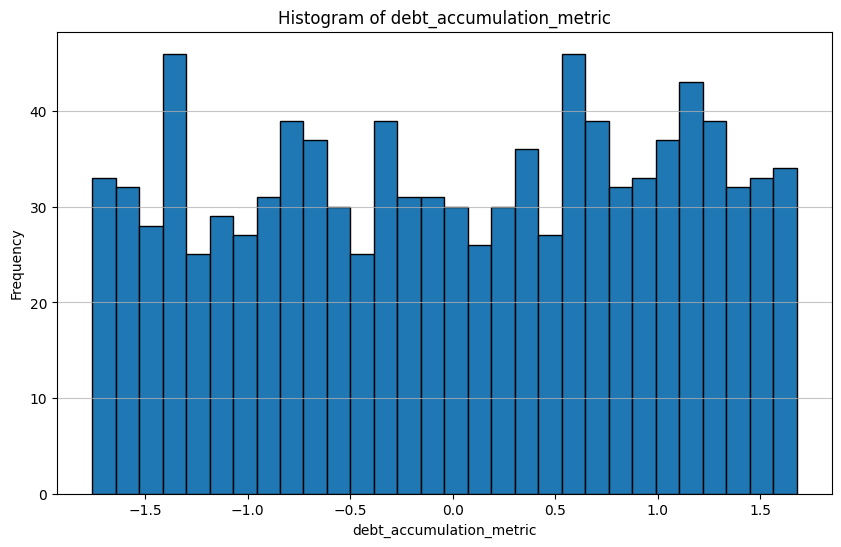

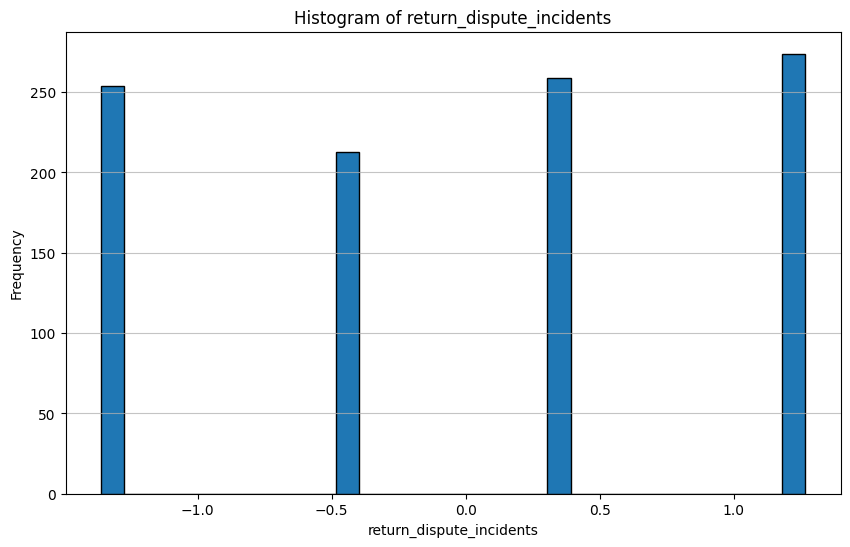

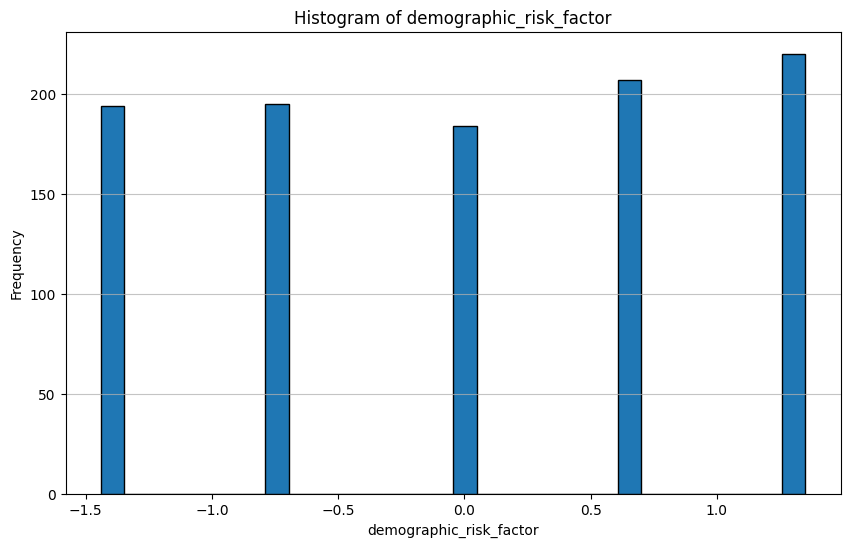

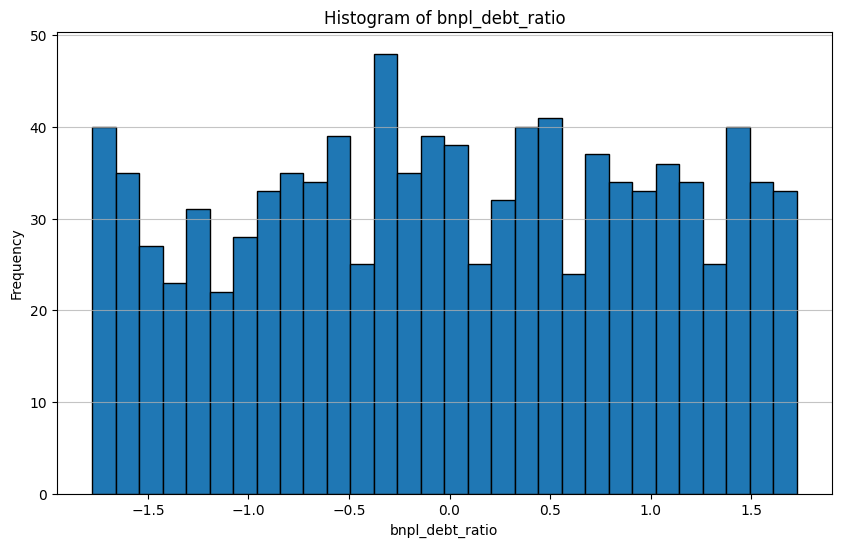

In [9]:
# Plotting histograms for continuous columns
continuous_cols = continuous_col(data_scaled)
for column in continuous_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(data_scaled[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('Plots\Histograms\\{column}_histogram.png')
    plt.show()
    plt.close()

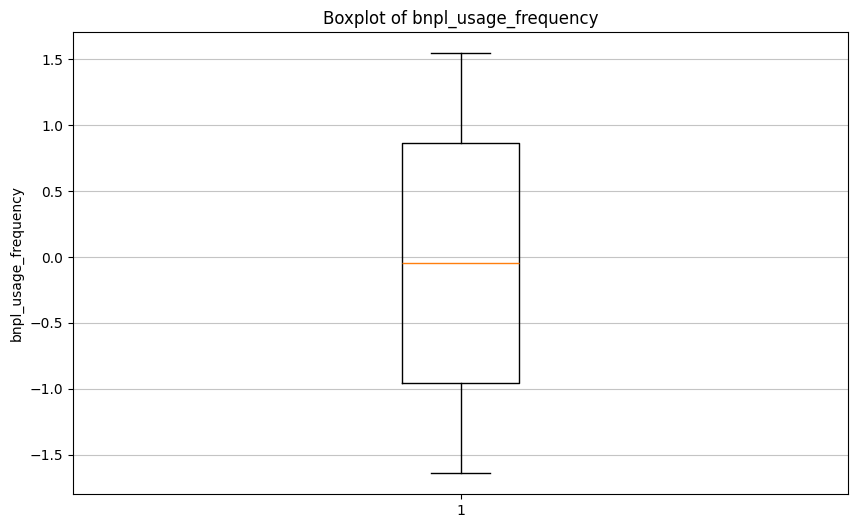

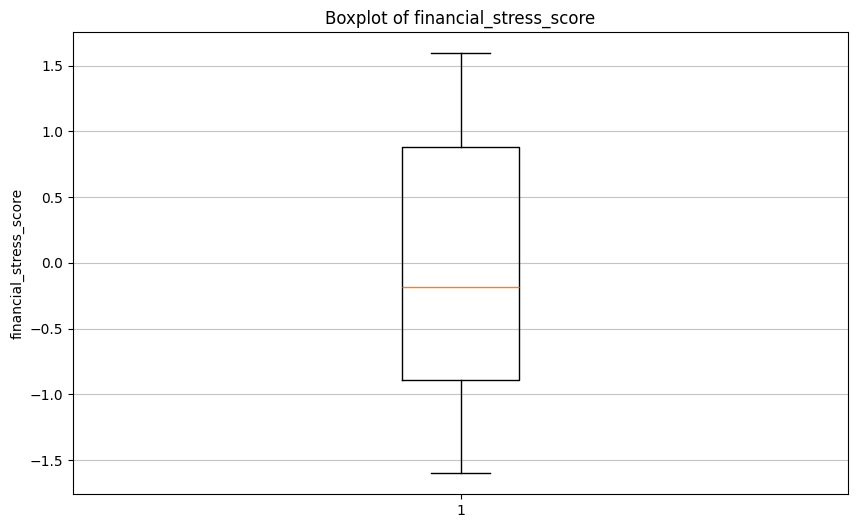

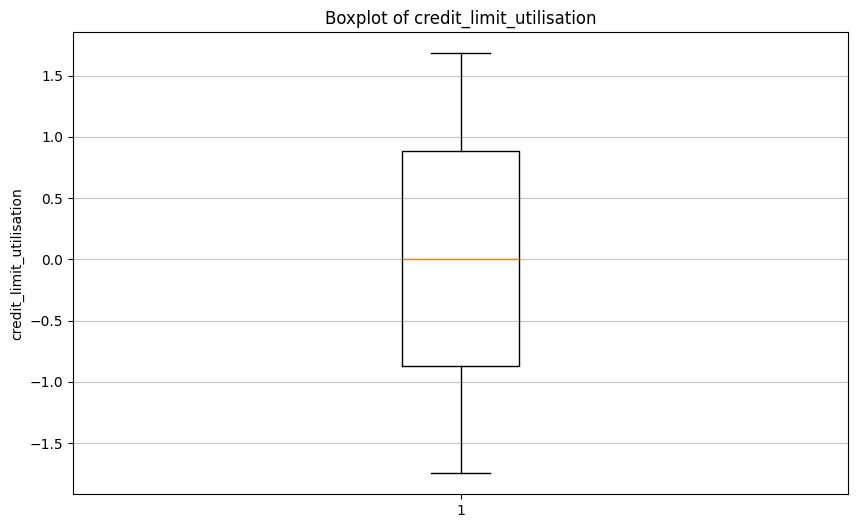

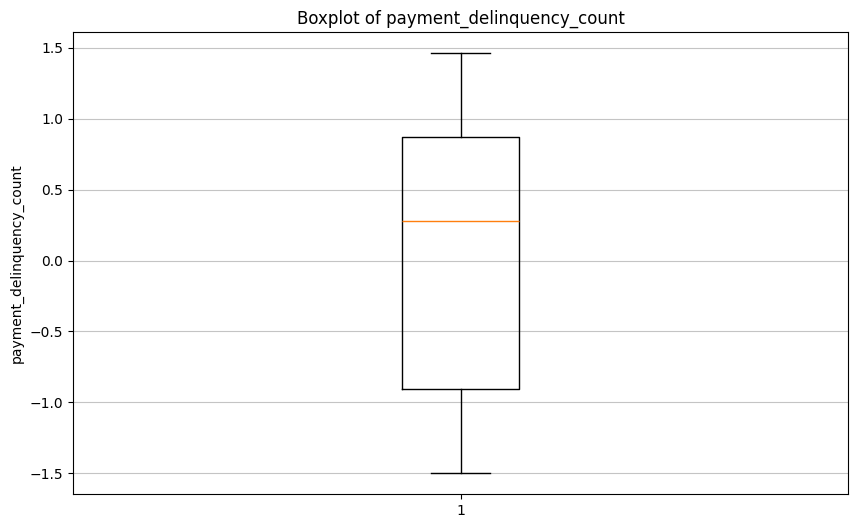

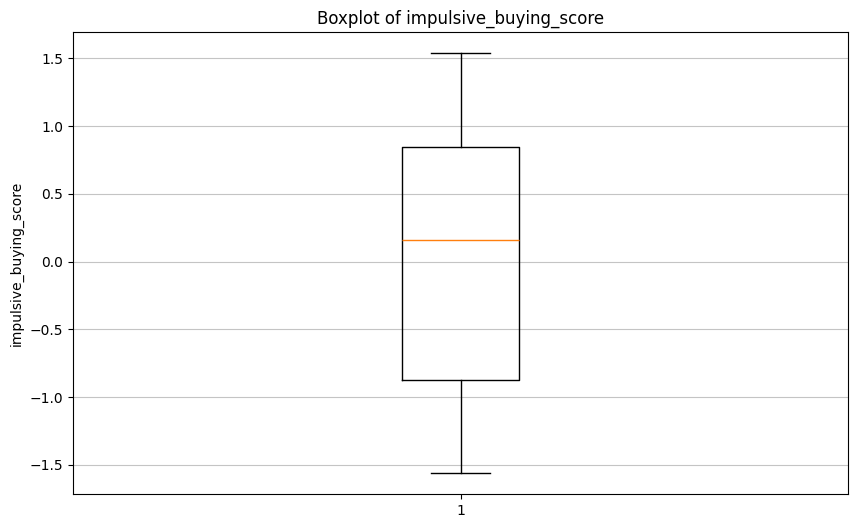

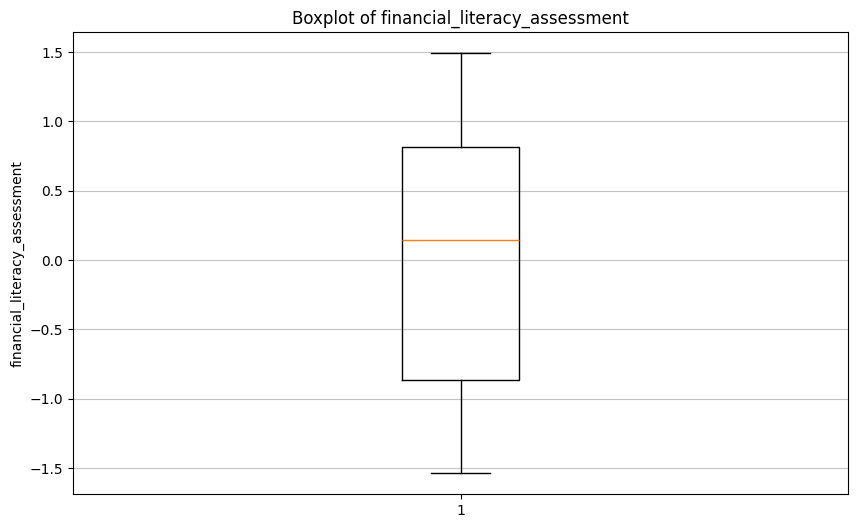

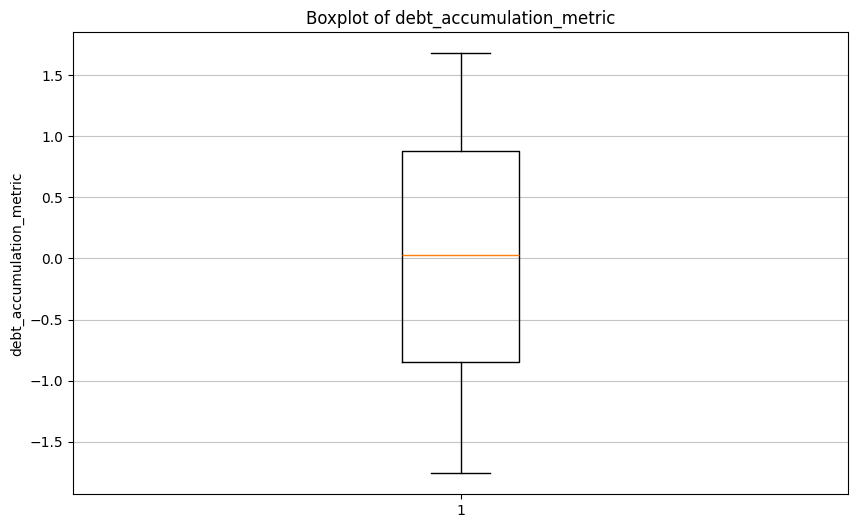

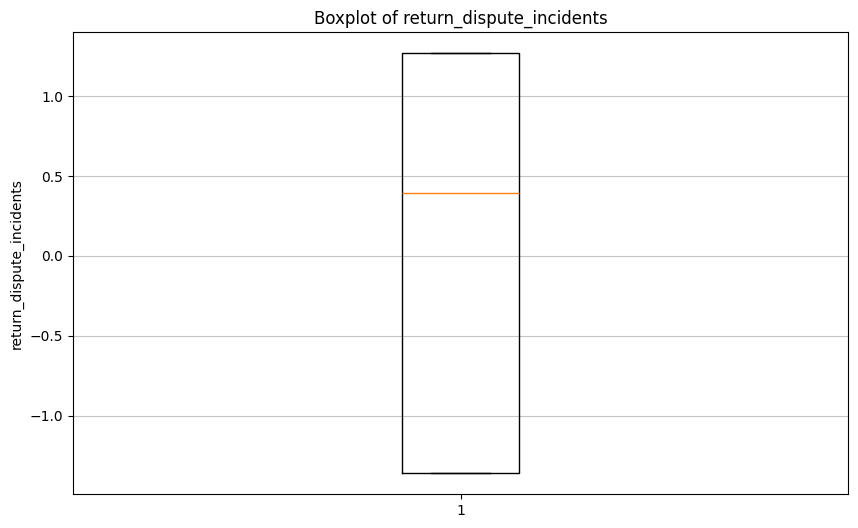

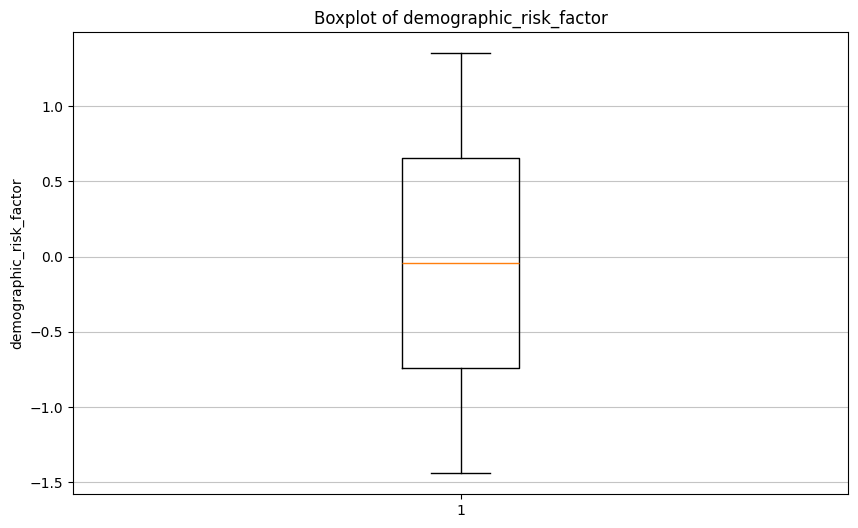

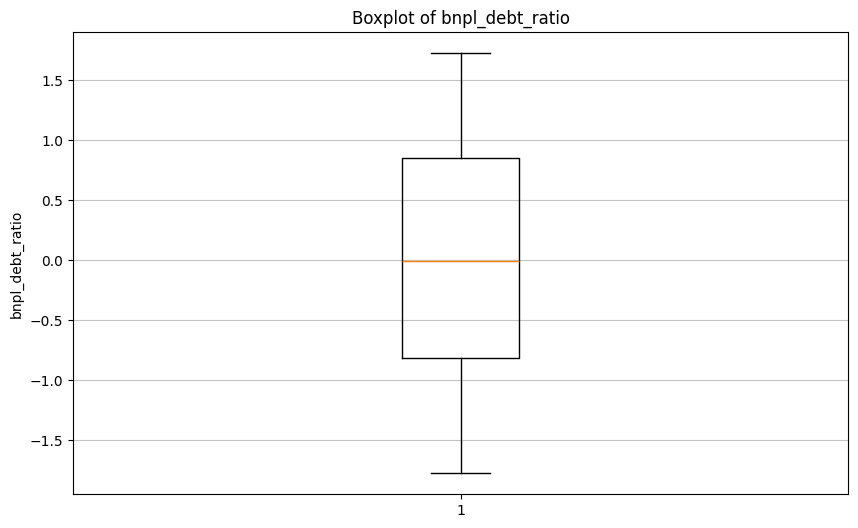

In [10]:
#print boxplots for continuous columns
for column in continuous_cols:
    plt.figure(figsize=(10, 6))
    plt.boxplot(data_scaled[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('Plots\Boxplots\\{column}boxplots.png')
    plt.show()
    plt.close()

Balance of over_indebtedness_flag:
 over_indebtedness_flag
0    0.637
1    0.363
Name: proportion, dtype: float64
Balance of external_repayment_loans:
 external_repayment_loans
0    0.598
1    0.402
Name: proportion, dtype: float64
Balance of credit_card_interest_incidence:
 credit_card_interest_incidence
0    0.656
1    0.344
Name: proportion, dtype: float64
Balance of default_flag:
 default_flag
0    0.915
1    0.085
Name: proportion, dtype: float64


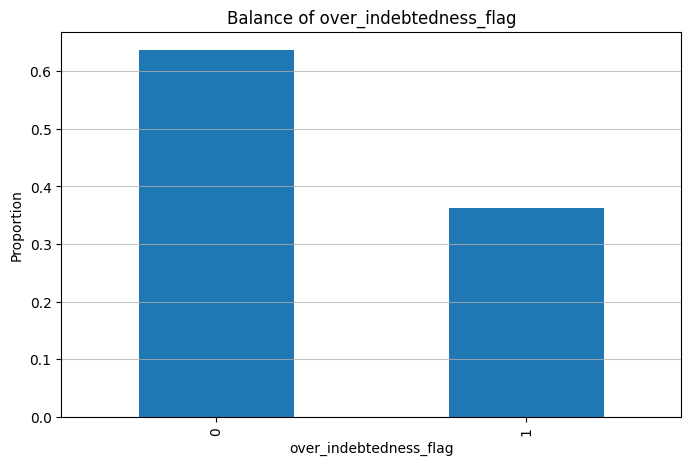

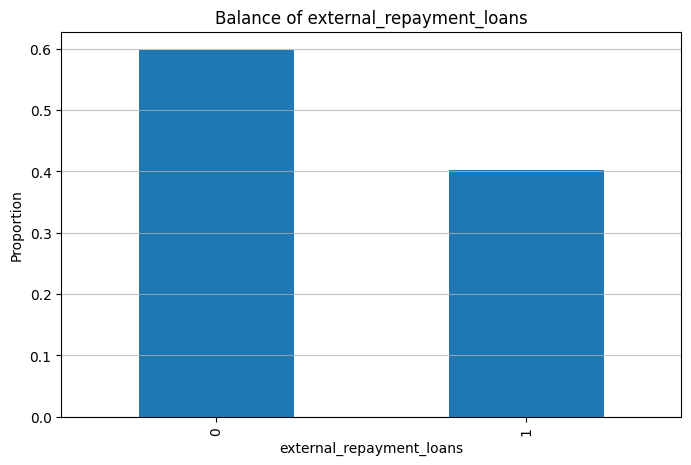

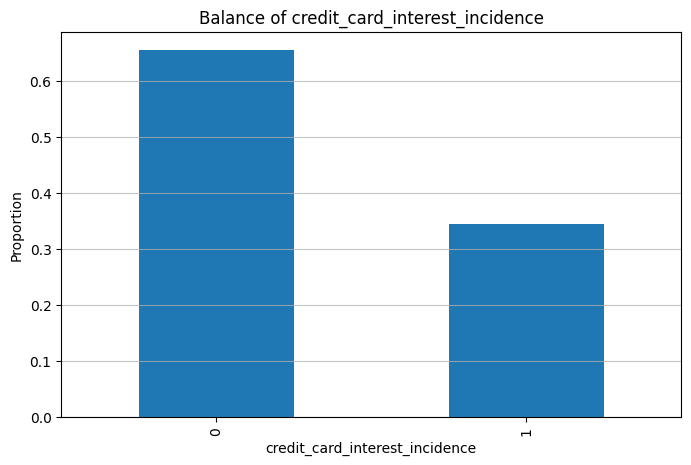

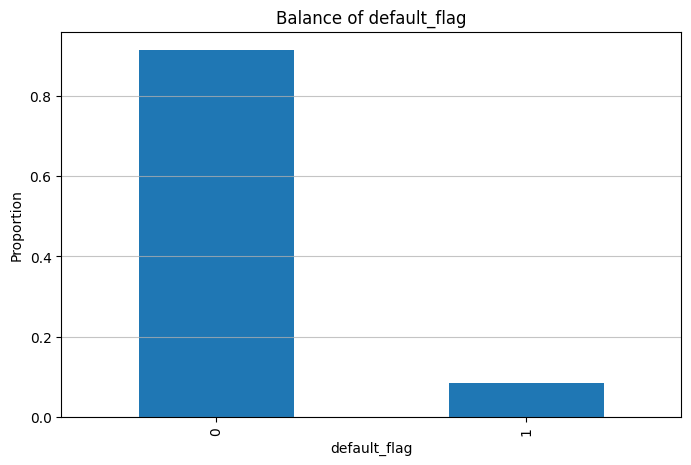

In [11]:
#check the balance of the binary columns
binary_cols = binary_col(data_scaled)
for column in binary_cols:
    balance = data_scaled[column].value_counts(normalize=True)
    print(f"Balance of {column}:\n", balance)
    plt.figure(figsize=(8, 5))
    balance.plot(kind='bar')
    plt.title(f'Balance of {column}')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('Plots\Balances\\{column}balance.png')

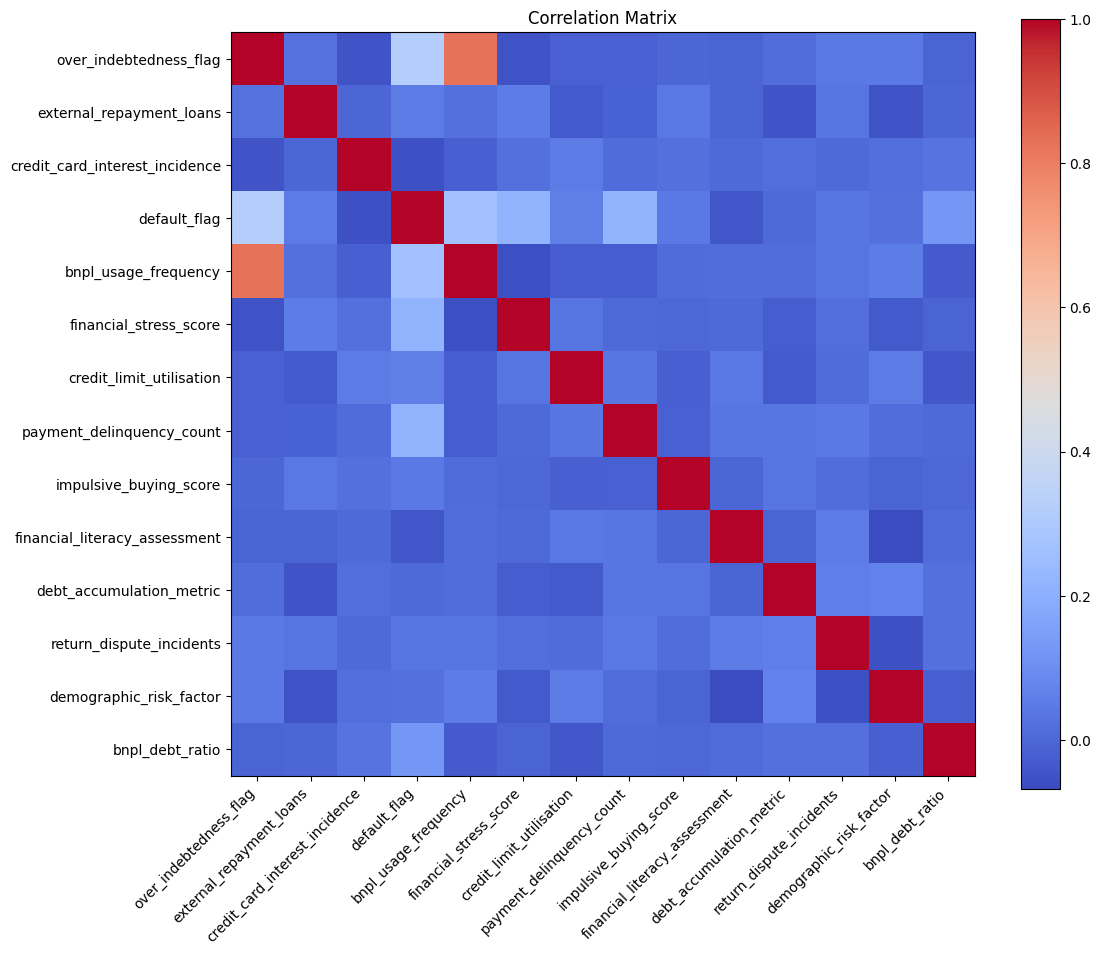

In [12]:
#get the correlation matrix
correlation_matrix = data_scaled.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(ticks=np.arange(len(data_scaled.columns)), labels=data_scaled.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(data_scaled.columns)), labels=data_scaled.columns)
plt.savefig('Plots\Correlation Matricies\correlation_matrix.png')
plt.show()
plt.close()

<Figure size 1000x600 with 0 Axes>

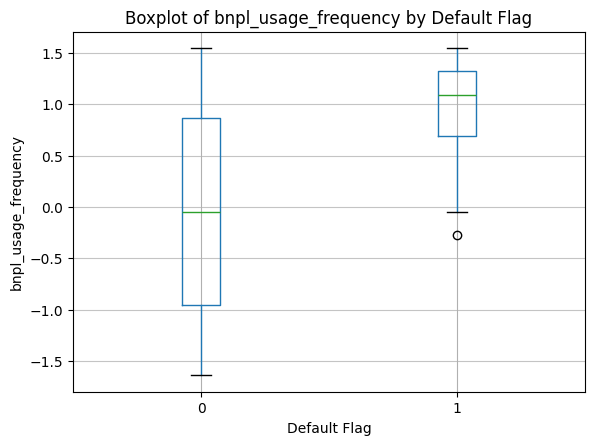

<Figure size 1000x600 with 0 Axes>

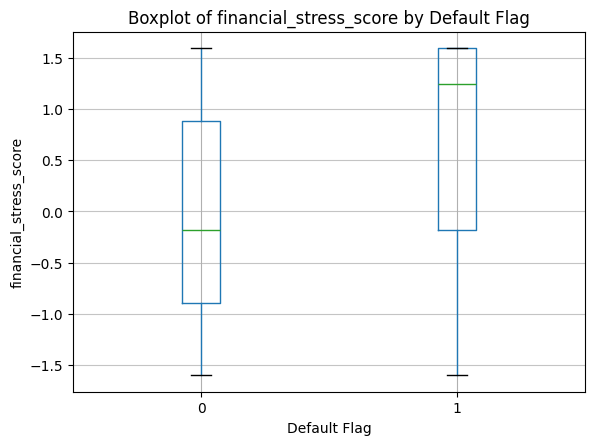

<Figure size 1000x600 with 0 Axes>

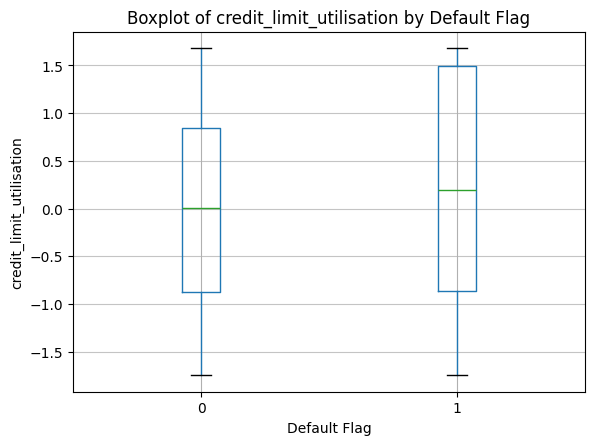

<Figure size 1000x600 with 0 Axes>

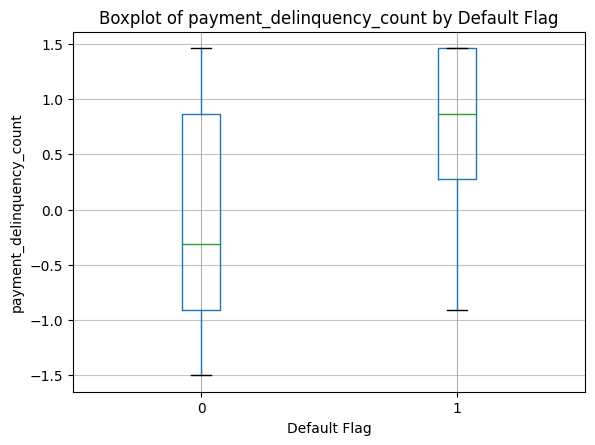

<Figure size 1000x600 with 0 Axes>

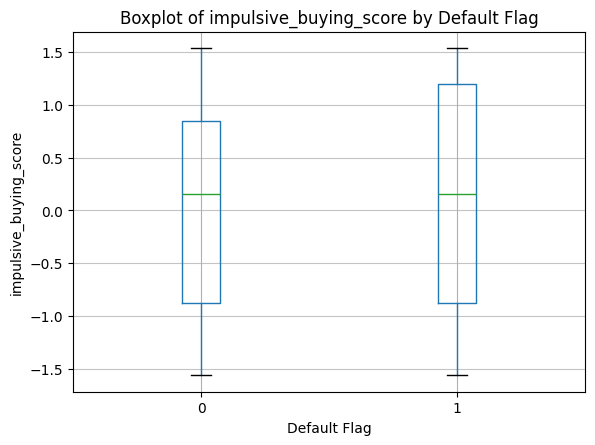

<Figure size 1000x600 with 0 Axes>

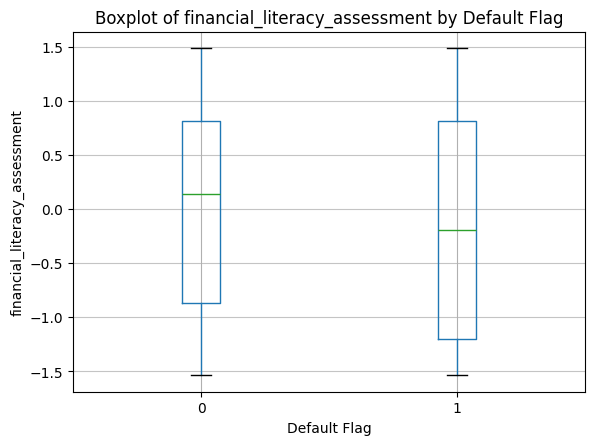

<Figure size 1000x600 with 0 Axes>

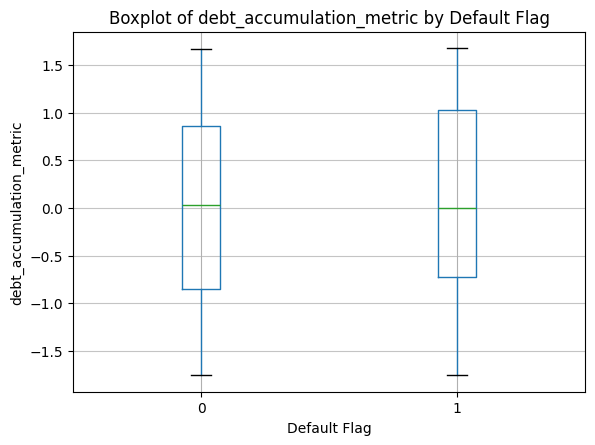

<Figure size 1000x600 with 0 Axes>

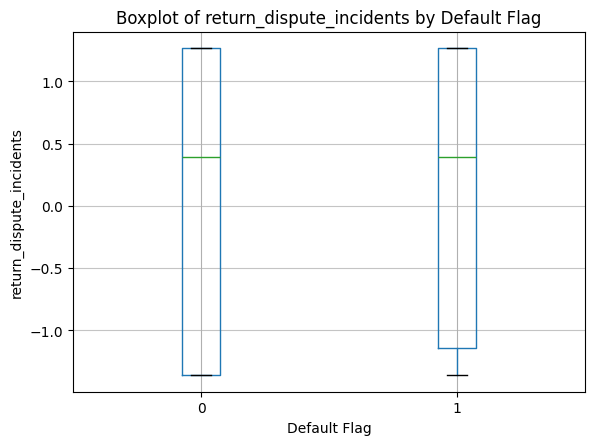

<Figure size 1000x600 with 0 Axes>

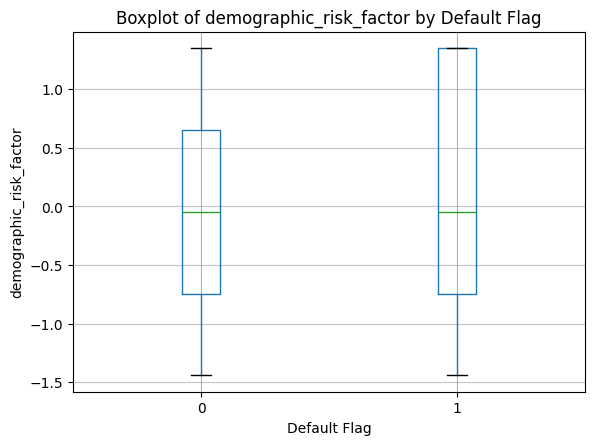

<Figure size 1000x600 with 0 Axes>

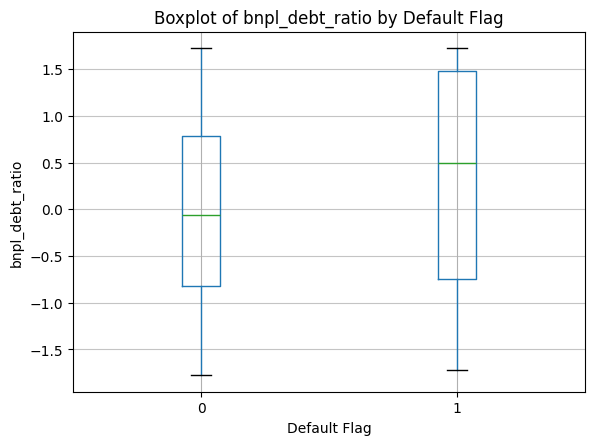

In [13]:
#plot 2 boxplots for each column one with default flag 0 and one with default flag 1
data_scaled_cleaned=pd.read_csv('Tables/bnpl_scaled_cleaned.csv', index_col=0)
continuous_cols = continuous_col(data_scaled_cleaned)
for column in continuous_cols:
    plt.figure(figsize=(10, 6))
    data_scaled_cleaned.boxplot(column=column, by='default_flag')
    plt.title(f'Boxplot of {column} by Default Flag')
    plt.suptitle('')
    plt.xlabel('Default Flag')
    plt.ylabel(column)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig(f'Plots\Boxplots\\{column}_boxplot_by_default_flag.png')

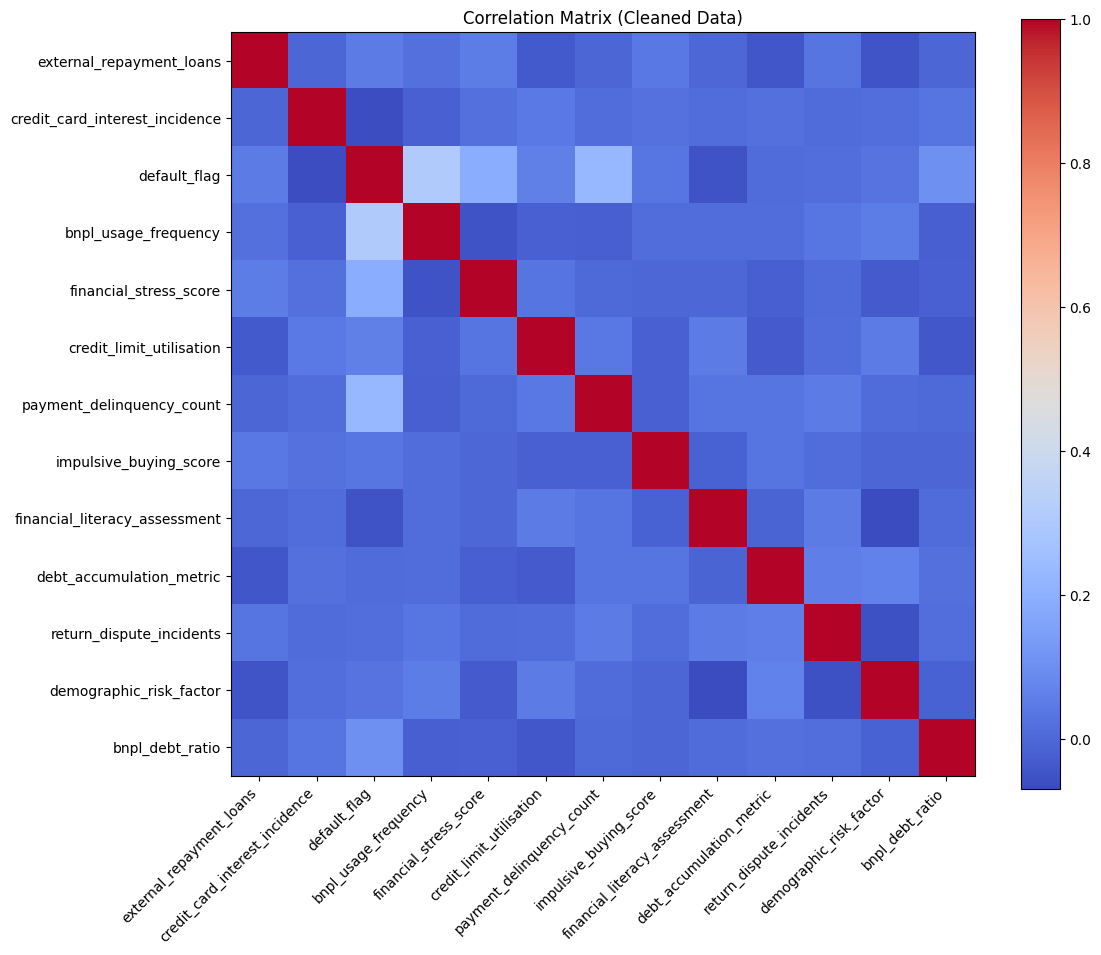

In [14]:
#plot the correlation matrix again after removing outliers
correlation_matrix_cleaned = data_scaled_cleaned.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix_cleaned, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix (Cleaned Data)')
#change the x and y ticks to the column names
plt.xticks(ticks=np.arange(len(data_scaled_cleaned.columns)), labels=data_scaled_cleaned.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(data_scaled_cleaned.columns)), labels=data_scaled_cleaned.columns)
plt.savefig('Plots\Correlation Matricies\correlation_matrix_cleaned.png')
plt.show()
plt.close()




Balance of external_repayment_loans after cleaning:
 external_repayment_loans
0    0.598187
1    0.401813
Name: proportion, dtype: float64


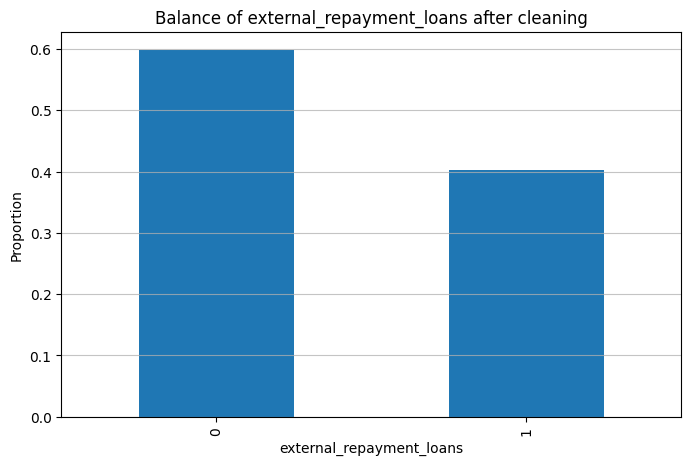

Balance of credit_card_interest_incidence after cleaning:
 credit_card_interest_incidence
0    0.656596
1    0.343404
Name: proportion, dtype: float64


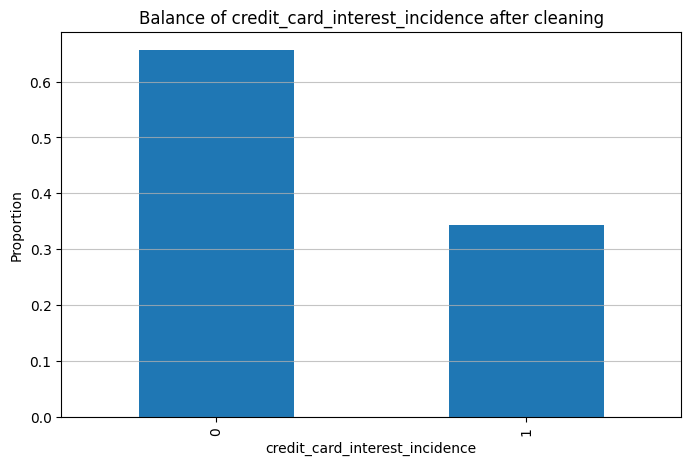

Balance of default_flag after cleaning:
 default_flag
0    0.92145
1    0.07855
Name: proportion, dtype: float64


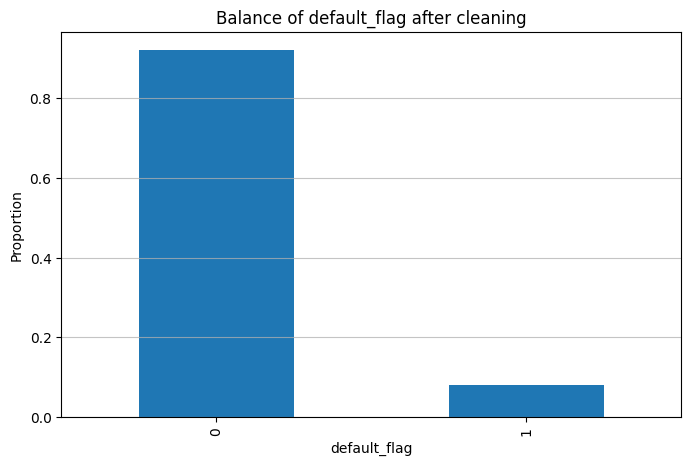

In [15]:
#check the balance of the binary columns again after removing outliers
binary_cols = binary_col(data_scaled_cleaned)
for column in binary_cols:
    balance = data_scaled_cleaned[column].value_counts(normalize=True)
    print(f"Balance of {column} after cleaning:\n", balance)
    plt.figure(figsize=(8, 5))
    balance.plot(kind='bar')
    plt.title(f'Balance of {column} after cleaning')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.grid(axis='y', alpha=0.75)
    plt.savefig(f'Plots\Balances\\{column}_balance_cleaned.png')
    plt.show()

In [16]:
data_engineered = pd.read_csv('Tables/bnpl_engineered.csv', index_col=0)

<Figure size 1000x600 with 0 Axes>

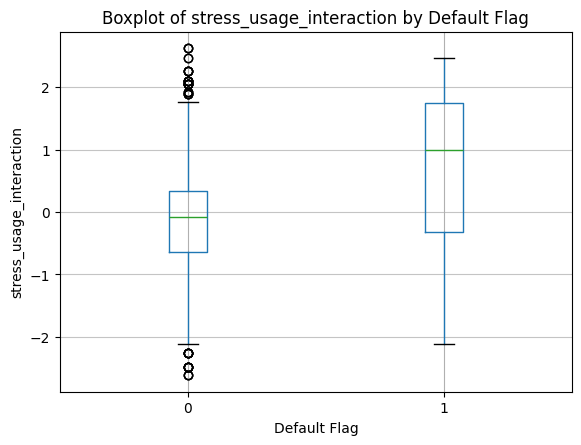

In [17]:
# Create boxplots for new interaction features
new_columns = [
    'stress_usage_interaction',
]
for column in new_columns:
    plt.figure(figsize=(10, 6))
    data_engineered.boxplot(column=column, by='default_flag')
    plt.title(f'Boxplot of {column} by Default Flag')
    plt.suptitle('')
    plt.xlabel('Default Flag')
    plt.ylabel(column)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('Plots\Boxplots\\{column}_boxplot_by_default_flag.png')

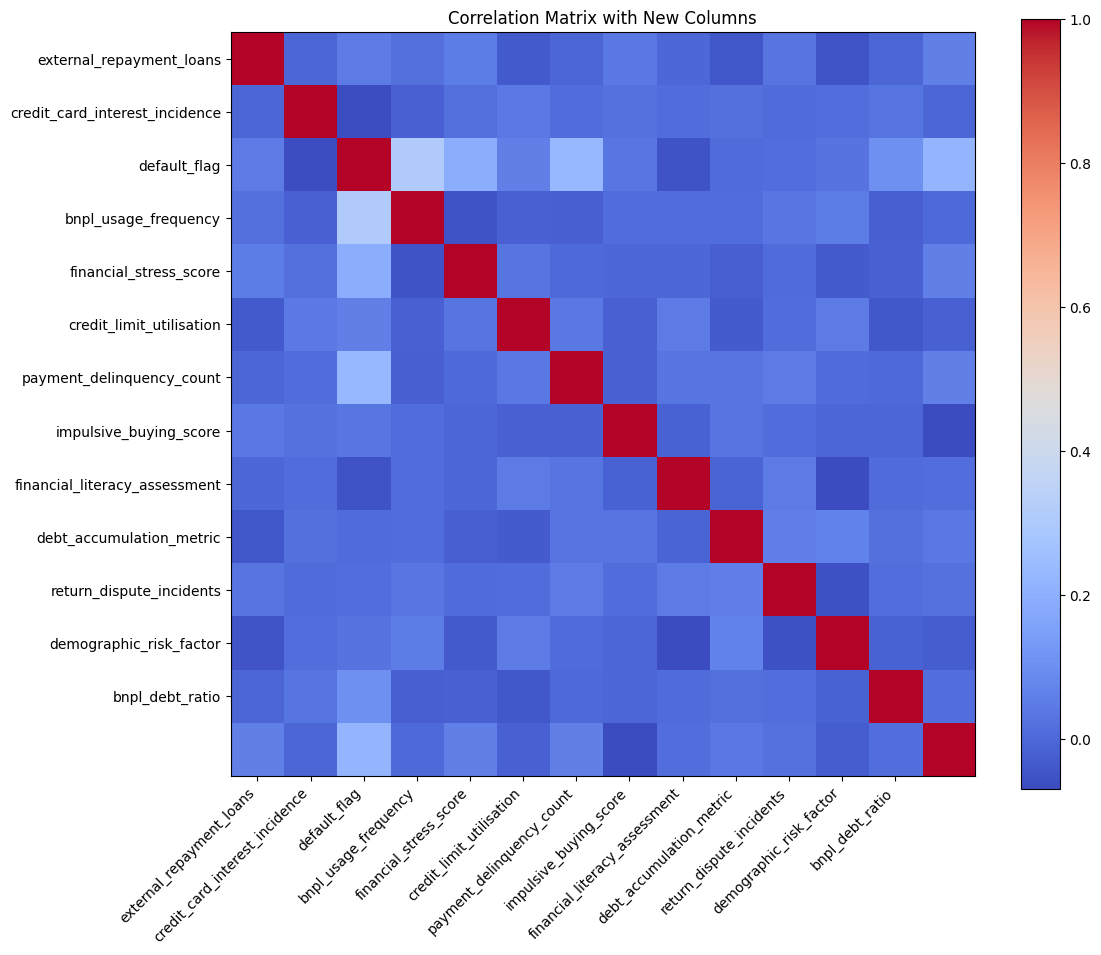

<Figure size 640x480 with 0 Axes>

In [18]:
#plot a new correlation matrix with the new columns
correlation_matrix_new = data_engineered.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix_new, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix with New Columns')
#change the x and y ticks to the column names
plt.xticks(ticks=np.arange(len(data_scaled_cleaned.columns)), labels=data_scaled_cleaned.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(data_scaled_cleaned.columns)), labels=data_scaled_cleaned.columns)
plt.show()
plt.savefig('Plots\Correlation Matricies\correlation_matrix_new.png')

In [19]:
# List of your result files
model_files = {
    "Logistic Regression": "Results/LR_model_results.json",
    "Random Forest": "Results/RF_model_results.json",
    "XGBoost": "Results/XGB_model_results.json",
    "SOM + Random Forest": "Results/SOM_RF_model_results.json",
    "SOM + XGBoost": "Results/SOM_XGB_model_results.json",
    "K-Means + Random Forest": "Results/K-Means_RF_model_results.json",
    "K-Means + XGBoost": "Results/K-Means_XGB_model_results.json"
}

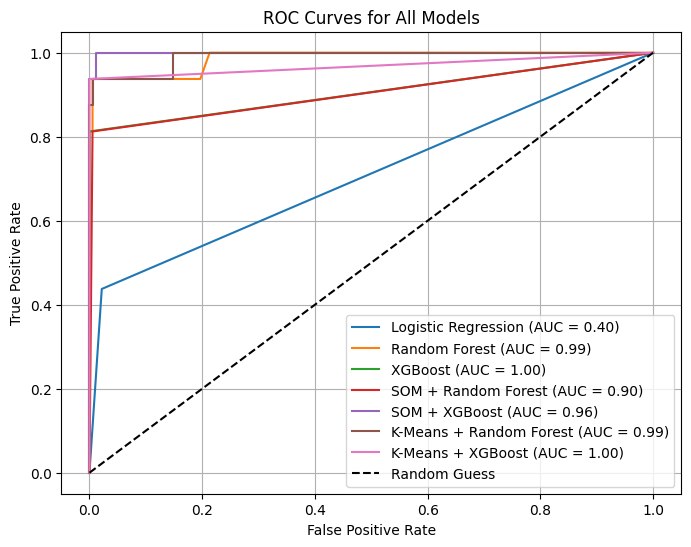

In [20]:
#Plotting ROC curves for all models
plt.figure(figsize=(8,6))
for model_name, file in model_files.items():
    with open(file, "r") as f:
        results = json.load(f)
    
    fpr = results["fpr"]
    tpr = results["tpr"]
    auc = results["roc_auc"]
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

# Plot baseline (random classifier)
plt.plot([0,1], [0,1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('Plots/roc_curves_all_models.png')
plt.show()

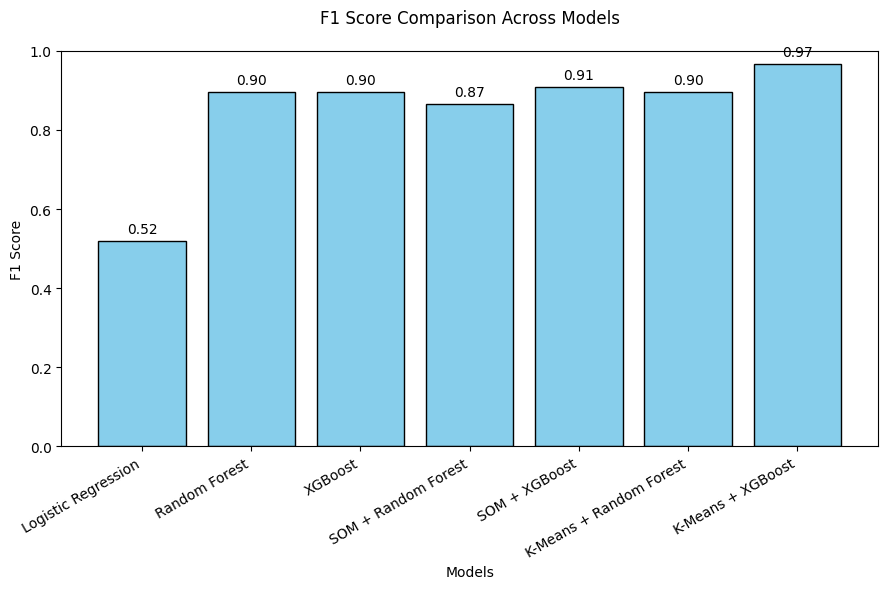

In [21]:
# Plotting F1 scores for all models
f1_scores = {}
for model_name, file in model_files.items():
    with open(file, "r") as f:
        results = json.load(f)
    f1_scores[model_name] = results["f1_score"]  

# Plot the F1 scores
plt.figure(figsize=(9,6))
plt.bar(f1_scores.keys(), f1_scores.values(), color="skyblue", edgecolor="black")

plt.ylabel("F1 Score")
plt.xlabel("Models")
plt.title("F1 Score Comparison Across Models",pad=20)
plt.ylim(0, 1)  # scores between 0 and 1
plt.xticks(rotation=30, ha="right")

for i, (model, score) in enumerate(f1_scores.items()):
    plt.text(i, score + 0.02, f"{score:.2f}", ha="center", fontsize=10)

plt.tight_layout()
plt.savefig('Plots/f1_scores_comparison.png')
plt.show()

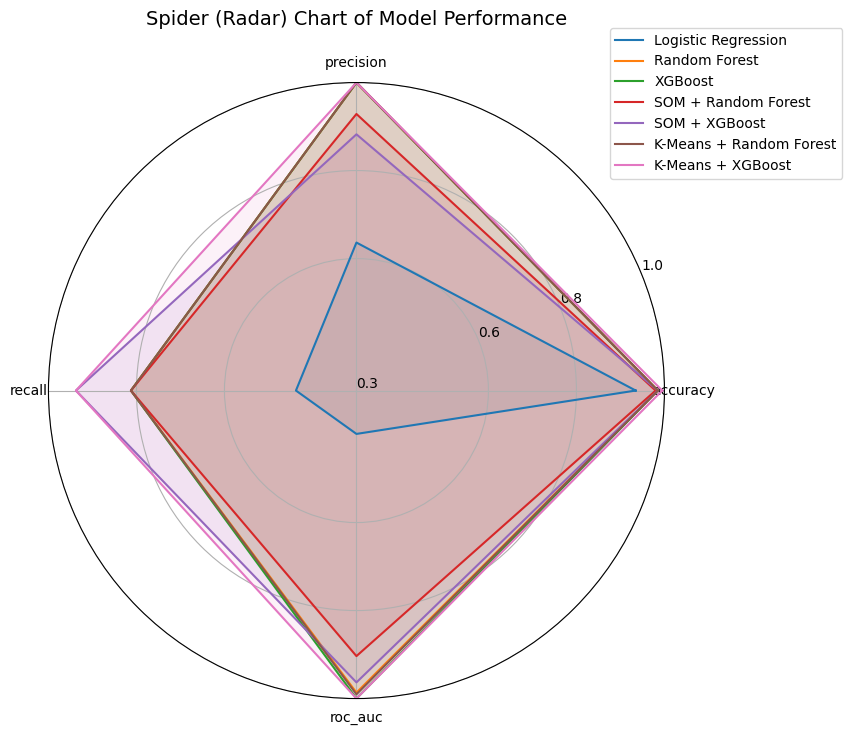

In [22]:
# Spider (Radar) Chart of Model Performance
metrics = ["accuracy", "precision", "recall", "roc_auc"]
num_vars = len(metrics)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the circle

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Loop through models
for model_name, file in model_files.items():
    with open(file, "r") as f:
        results = json.load(f)

    values = [results[m] for m in metrics]
    values += values[:1]  # close the circle

    ax.plot(angles, values, label=model_name)
    ax.fill(angles, values, alpha=0.1)

# Set axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0.3, 1.0)   
ax.set_yticks([0.3, 0.6, 0.8, 1.0])  
ax.set_yticklabels(["0.3", "0.6", "0.8", "1.0"])
plt.title("Spider (Radar) Chart of Model Performance", size=14, y=1.08)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.savefig('Plots/spider_chart_model_performance.png')
plt.show()

In [23]:
# Load results from JSON files
with open("Results/LR_model_results.json", "r") as f:
    LR_results = json.load(f)
with open("Results/RF_model_results.json", "r") as f:
    RF_results = json.load(f)
with open("Results/XGB_model_results.json", "r") as f:
    XGB_results = json.load(f)
with open("Results/SOM_RF_model_results.json", "r") as f:
    SOM_RF_results = json.load(f)
with open("Results/SOM_XGB_model_results.json", "r") as f:
    SOM_XGB_results = json.load(f)
with open("Results/K-Means_RF_model_results.json", "r") as f:
    KMeans_RF_results = json.load(f)
with open("Results/K-Means_XGB_model_results.json", "r") as f:
    KMeans_XGB_results = json.load(f)

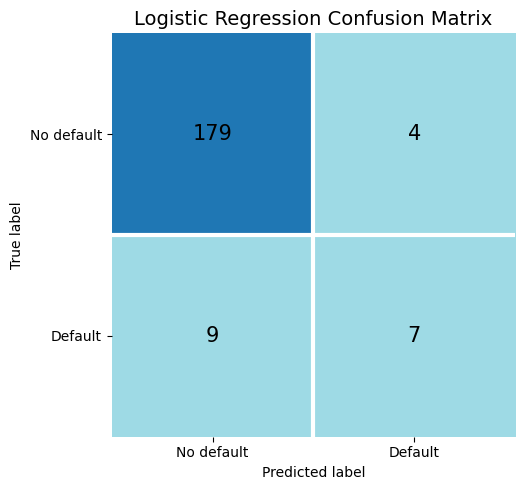

In [24]:
# Plot confusion matrix for Logistic Regression

cm = np.array(LR_results["confusion_matrix"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No default', 'Default'])

fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=0)

for text in disp.text_.ravel():
    text.set_fontsize(15)
    text.set_color('black')

n_classes = cm.shape[0]
for i in range(1, n_classes):
    ax.axhline(i - 0.5, color='white', linewidth=3)
    ax.axvline(i - 0.5, color='white', linewidth=3)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Logistic Regression Confusion Matrix', fontsize=14)
plt.tight_layout()
plt.savefig("Plots/Confusion Matricies/Logistic_Regression_cm.png", dpi=300, bbox_inches='tight')
plt.show()


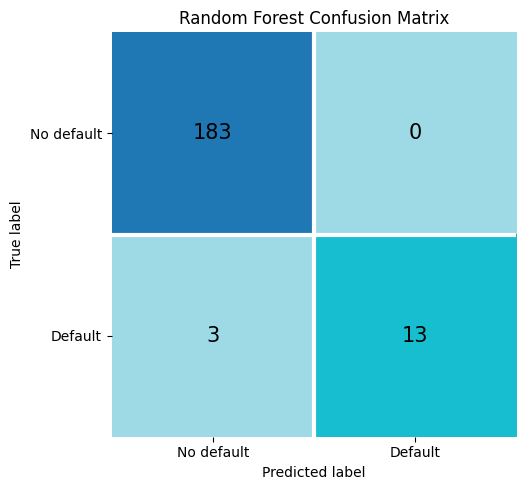

In [25]:
# Plot confusion matrix for Random Forest
cm = np.array(RF_results["confusion_matrix"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No default', 'Default'])

fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=0)

for text in disp.text_.ravel():  
    text.set_fontsize(15)
    text.set_color('black')  
n_classes = cm.shape[0]
for i in range(1, n_classes):  
    ax.axhline(i - 0.5, color='white', linewidth=3) 
    ax.axvline(i - 0.5, color='white', linewidth=3) 
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.savefig("Plots/Confusion Matricies/Random_Forest_cm.png")
plt.show()

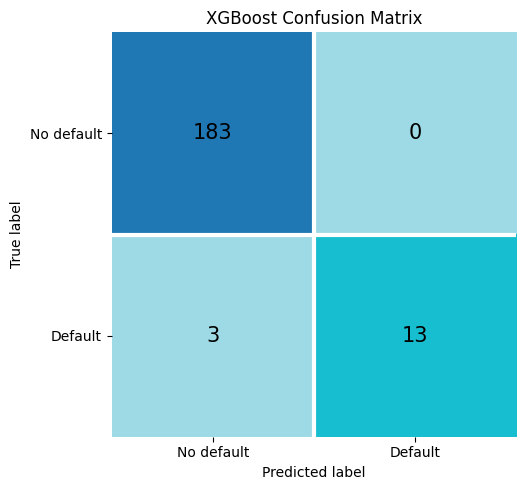

In [26]:
# Plot confusion matrix for XGBoost

cm = np.array(XGB_results["confusion_matrix"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No default', 'Default'])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=0)


for text in disp.text_.ravel():   
    text.set_fontsize(15)
    text.set_color('black')  
n_classes = cm.shape[0]
for i in range(1, n_classes):  
    ax.axhline(i - 0.5, color='white', linewidth=3)  
    ax.axvline(i - 0.5, color='white', linewidth=3)  
for spine in ax.spines.values():
    spine.set_visible(False)
plt.title('XGBoost Confusion Matrix')
plt.savefig("Plots/Confusion Matricies/XGBoost_cm.png")
plt.tight_layout()
plt.show()

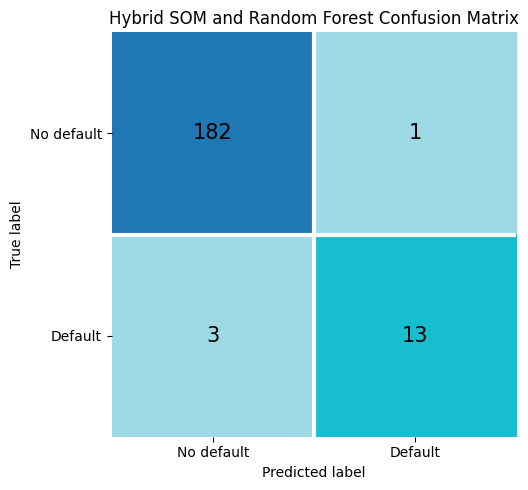

In [27]:
# Plot confusion matrix for SOM + Random Forest

cm = np.array(SOM_RF_results["confusion_matrix"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No default', 'Default'])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=0)

for text in disp.text_.ravel():   
    text.set_fontsize(15)
    text.set_color('black')  
n_classes = cm.shape[0]
for i in range(1, n_classes):  
    ax.axhline(i - 0.5, color='white', linewidth=3)  
    ax.axvline(i - 0.5, color='white', linewidth=3)  
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Hybrid SOM and Random Forest Confusion Matrix')
plt.tight_layout()
plt.savefig("Plots/Confusion Matricies/SOM+RF_cm.png")
plt.show()

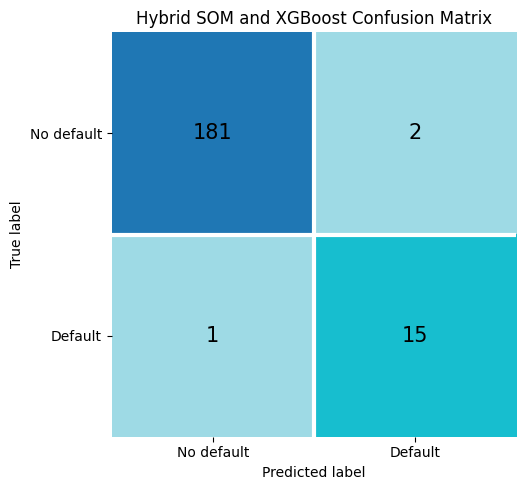

In [28]:
# Plot confusion matrix for SOM + XGBoost
cm = np.array(SOM_XGB_results["confusion_matrix"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No default', 'Default'])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=0)

for text in disp.text_.ravel(): 
    text.set_fontsize(15)
    text.set_color('black') 
n_classes = cm.shape[0]

for i in range(1, n_classes):  
    ax.axhline(i - 0.5, color='white', linewidth=3)  
    ax.axvline(i - 0.5, color='white', linewidth=3)  

for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.title('Hybrid SOM and XGBoost Confusion Matrix')
plt.savefig("Plots/Confusion Matricies/SOM+XGB_cm.png")
plt.tight_layout()
plt.show()

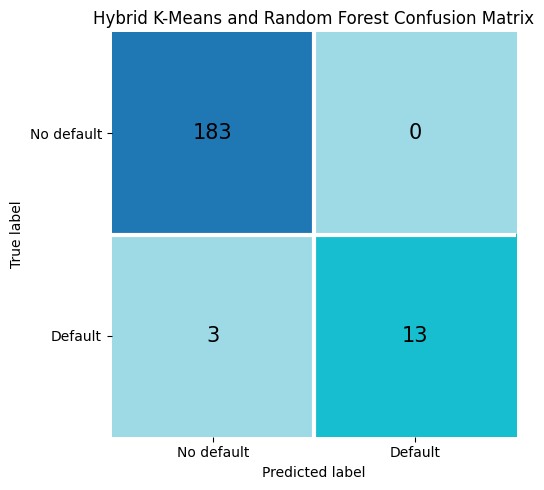

In [43]:
# Plot confusion matrix for K-Means + Random Forest

cm_rf = np.array(KMeans_RF_results["confusion_matrix"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No default', 'Default'])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=0)


for text in disp.text_.ravel():   
    text.set_fontsize(15)
    text.set_color('black')  
n_classes = cm_rf.shape[0]

for i in range(1, n_classes):  
    ax.axhline(i - 0.5, color='white', linewidth=3)  
    ax.axvline(i - 0.5, color='white', linewidth=3)  

for spine in ax.spines.values():
    spine.set_visible(False)
plt.title('Hybrid K-Means and Random Forest Confusion Matrix')
plt.savefig("Plots/Confusion Matricies/Kmean+RF_cm.png")
plt.tight_layout()
plt.show()

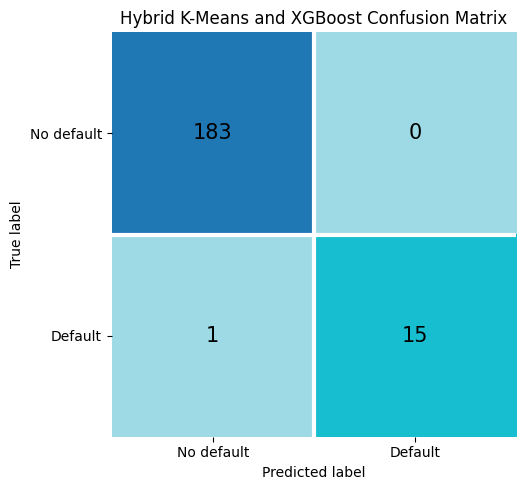

In [44]:
# Plot confusion matrix for K-Means + XGBoost

cm_xgb = np.array(KMeans_XGB_results["confusion_matrix"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No default', 'Default'])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(values_format='d', cmap='tab20_r', ax=ax, colorbar=0)


for text in disp.text_.ravel():  
    text.set_fontsize(15)
    text.set_color('black') 

n_classes = cm_xgb.shape[0]

for i in range(1, n_classes):  
    ax.axhline(i - 0.5, color='white', linewidth=3)  
    ax.axvline(i - 0.5, color='white', linewidth=3) 
 
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Hybrid K-Means and XGBoost Confusion Matrix')
plt.savefig("Plots/Confusion Matricies/Kmean+XGB_cm.png")
plt.tight_layout()
plt.show()

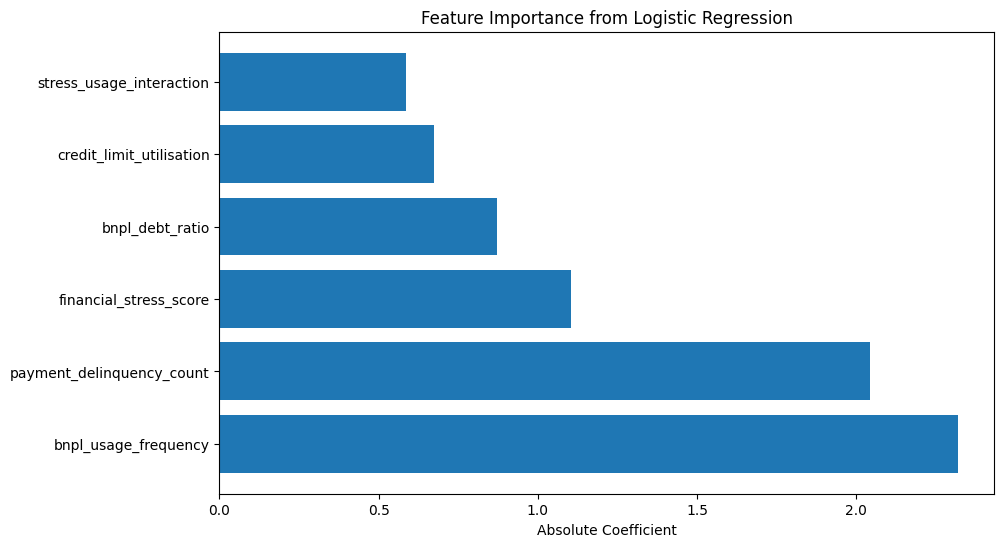

In [32]:
# Load feature importance from the csv file
log_reg_feature_importance = pd.read_csv("Results/logreg_feature_importance.csv")
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(log_reg_feature_importance['Feature'], log_reg_feature_importance['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance from Logistic Regression')
plt.savefig('Plots/Feature Importance/logreg_feature_importance.png')
plt.show()


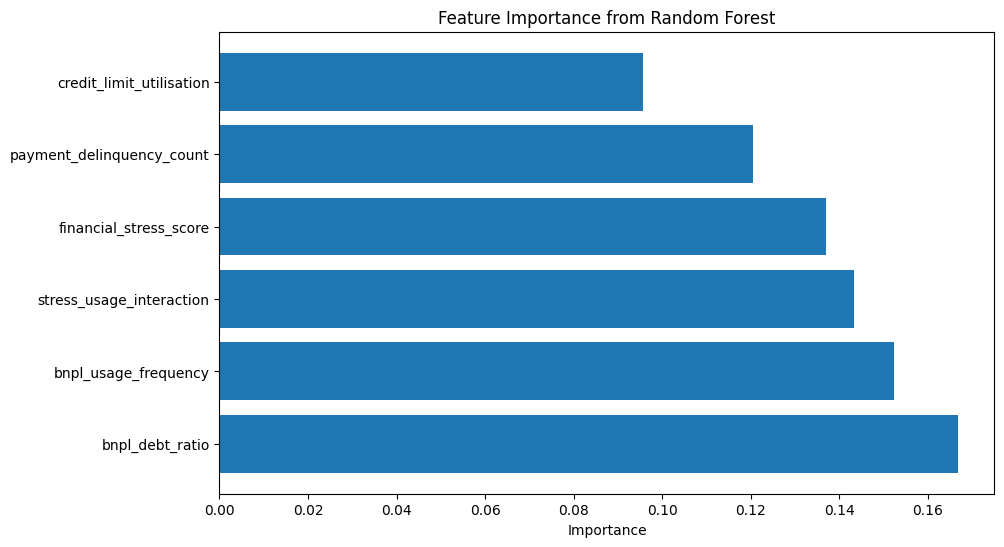

In [33]:
# Load feature importance from the csv file
rf_feature_importance = pd.read_csv("Results/rf_feature_importance.csv")
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.savefig('Plots/Feature Importance/rf_feature_importance.png')
plt.show()


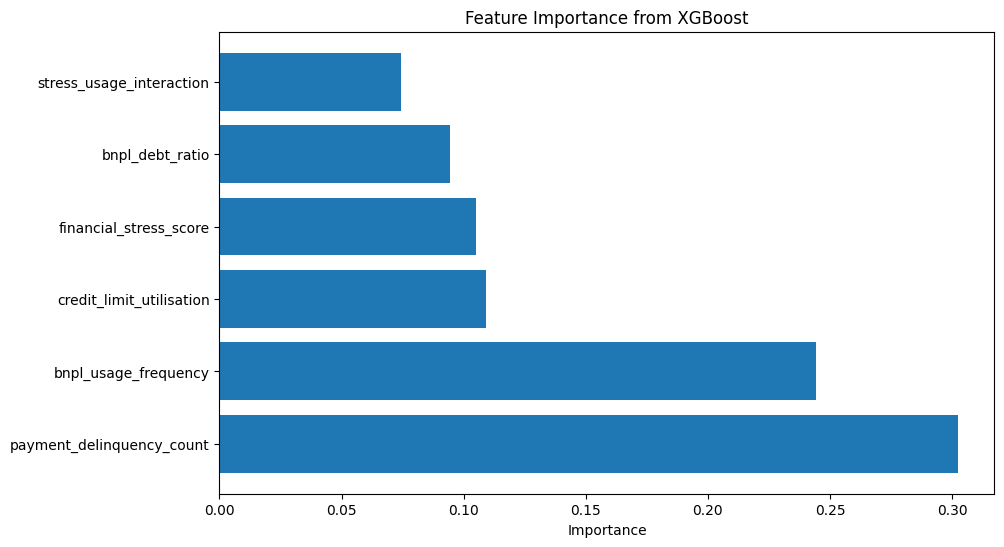

In [34]:
# Load feature importance from the csv file
XGB_feature_importance = pd.read_csv("Results/xgb_feature_importance.csv")
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(XGB_feature_importance['Feature'], XGB_feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from XGBoost')
plt.savefig('Plots/Feature Importance/xgb_feature_importance.png')
plt.show()


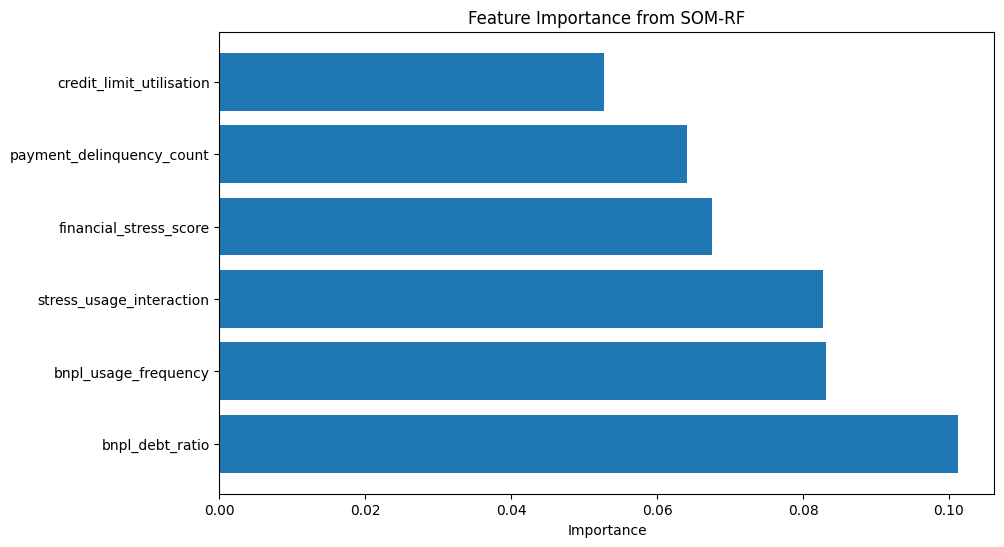

In [35]:
# Load feature importance from the csv file
SOM_RF_feature_importance = pd.read_csv("Results/som_rf_feature_importance.csv")
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(SOM_RF_feature_importance['Feature'], SOM_RF_feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from SOM-RF')
plt.savefig('Plots/Feature Importance/som_rf_feature_importance.png')
plt.show()


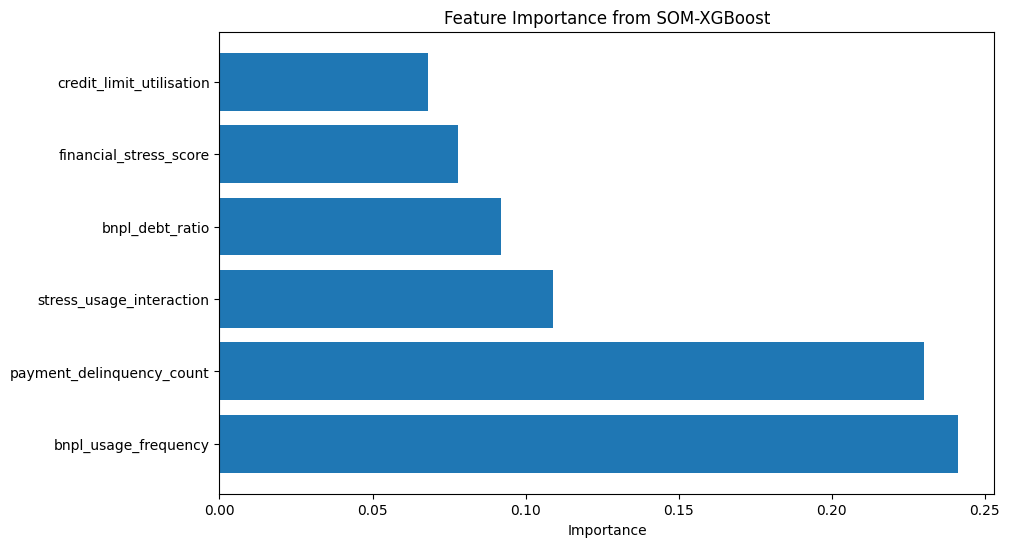

In [36]:
# Load feature importance from the csv file
SOM_XGB_feature_importance = pd.read_csv("Results/som_xgb_feature_importance.csv")
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(SOM_XGB_feature_importance['Feature'], SOM_XGB_feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from SOM-XGBoost')
plt.savefig('Plots/Feature Importance/som_xgb_feature_importance.png')
plt.show()


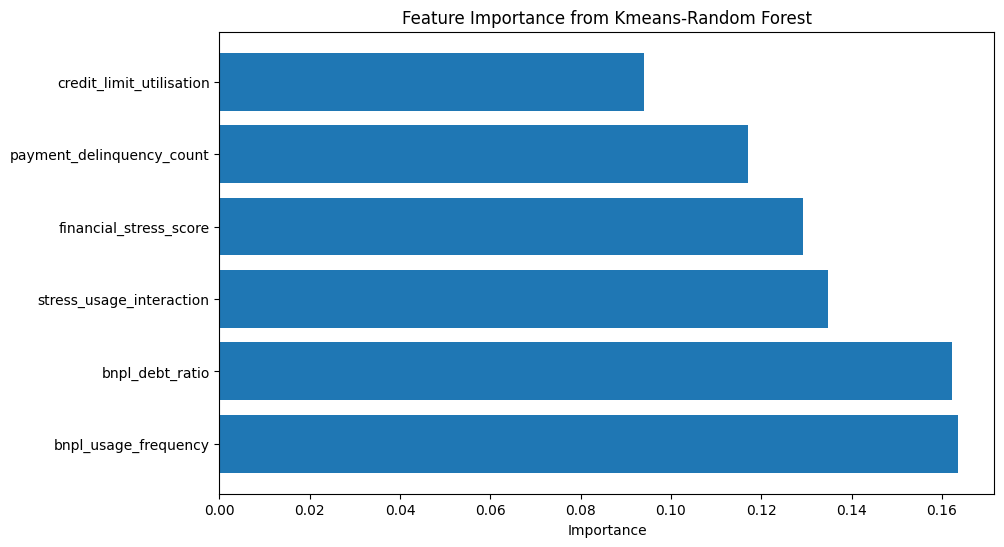

In [37]:
# Load feature importance from the csv file
Kmeans_RF_feature_importance = pd.read_csv("Results/kmeans_rf_feature_importance.csv")
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(Kmeans_RF_feature_importance['Feature'], Kmeans_RF_feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Kmeans-Random Forest')
plt.savefig('Plots/Feature Importance/kmeans_rf_feature_importance.png')
plt.show()


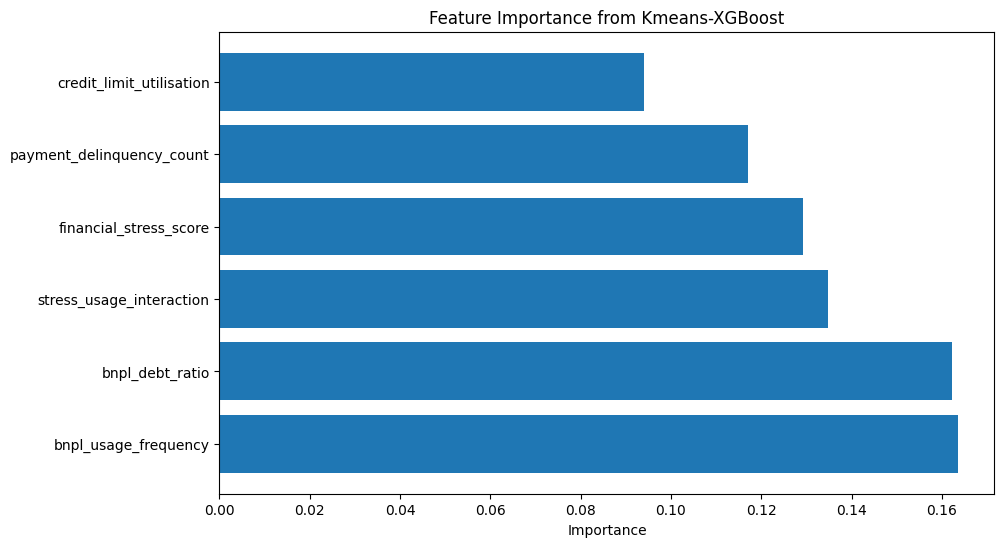

In [38]:
# Load feature importance from the csv file
Kmeans_XGB_feature_importance = pd.read_csv("Results/kmeans_xgb_feature_importance.csv")
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(Kmeans_XGB_feature_importance['Feature'], Kmeans_XGB_feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Kmeans-XGBoost')
plt.savefig('Plots/Feature Importance/kmeans_xgb_feature_importance.png')
plt.show()


In [ ]:
# Cleaning up the logistic regression feature importance dataframe
log_reg_feature_importance = log_reg_feature_importance.drop(columns=['Coefficient'])
log_reg_feature_importance = log_reg_feature_importance.sort_values(by='Abs_Coefficient')
log_reg_feature_importance = log_reg_feature_importance.rename(columns={'Abs_Coefficient': 'Importance'})

,Feature,Importance
5,stress_usage_interaction,0.586373
4,credit_limit_utilisation,0.672772
3,bnpl_debt_ratio,0.870560
2,financial_stress_score,1.102664
1,payment_delinquency_count,2.044539
0,bnpl_usage_frequency,2.318099


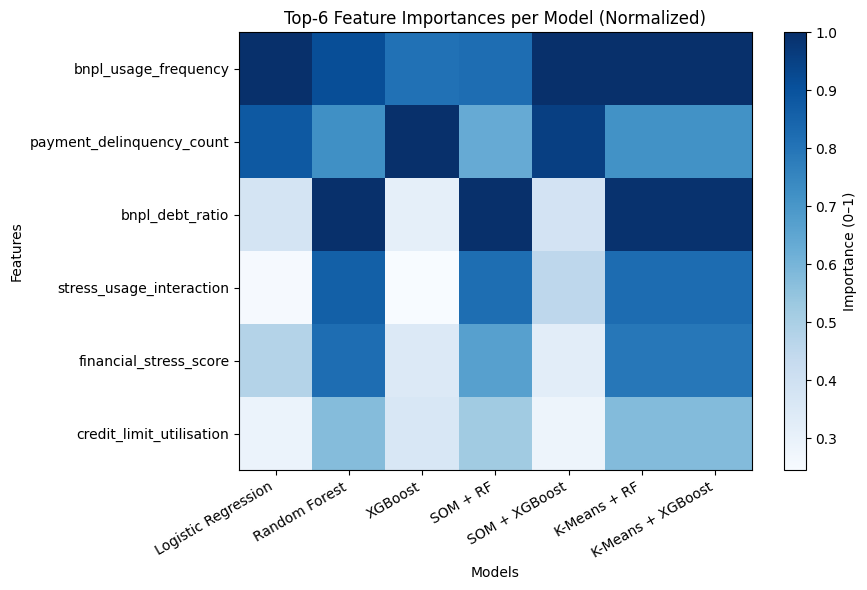

In [45]:
#Plot a heatmap comparing feature importance across all models
feature_col = "Feature"        
importance_col = "Importance"  

NORMALIZE_BY_MODEL = True      
ORDER_FEATURES_BY = "mean"     
ANNOTATE = False               
ROUND_TO = 2
FIGSIZE = (9, 6)


model_dfs = {
    "Logistic Regression": log_reg_feature_importance,
    "Random Forest": rf_feature_importance,
    "XGBoost": XGB_feature_importance,
    "SOM + RF": SOM_RF_feature_importance,
    "SOM + XGBoost": SOM_XGB_feature_importance,
    "K-Means + RF": Kmeans_RF_feature_importance,
    "K-Means + XGBoost": Kmeans_XGB_feature_importance,
}


# If all models have the same 6 features, you can take them from the first df
first_df = next(iter(model_dfs.values()))
features_order = list(first_df[feature_col].tolist())

# Compute the intersection and preserve the first_df order
shared = set(features_order)
for df in model_dfs.values():
    shared &= set(df[feature_col].tolist())
features_order = [f for f in features_order if f in shared]

if len(features_order) == 0:
    raise ValueError("No shared features found across models.")

mat = pd.DataFrame(index=features_order, columns=list(model_dfs.keys()), dtype=float)
for model_name, df in model_dfs.items():
    s = df.set_index(feature_col)[importance_col]
    mat[model_name] = s.reindex(features_order).fillna(0.0).values


#normalize by model (column-wise)
if NORMALIZE_BY_MODEL:
    mat = mat.apply(lambda col: col / col.max() if col.max() > 0 else col, axis=0)

# Re-order features
if ORDER_FEATURES_BY == "mean":
    mat = mat.loc[mat.mean(axis=1).sort_values(ascending=False).index]
elif ORDER_FEATURES_BY == "max":
    mat = mat.loc[mat.max(axis=1).sort_values(ascending=False).index]

# 6) Plot the heatmap
fig, ax = plt.subplots(figsize=FIGSIZE)
im = ax.imshow(mat.values, aspect="auto", cmap="Blues") 
ax.set_xticks(np.arange(mat.shape[1]))
ax.set_xticklabels(mat.columns, rotation=30, ha="right")
ax.set_yticks(np.arange(mat.shape[0]))
ax.set_yticklabels(mat.index)
ax.set_xlabel("Models")
ax.set_ylabel("Features")
ax.set_title("Top-6 Feature Importances per Model" + (" (Normalized)" if NORMALIZE_BY_MODEL else ""))

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Importance" + (" (0–1)" if NORMALIZE_BY_MODEL else ""))

if ANNOTATE:
    vals = mat.round(ROUND_TO).values
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            ax.text(j, i, vals[i, j], ha="center", va="center")

plt.tight_layout()
plt.savefig("Plots/feature_importance_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
